In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectKBest, mutual_info_classif

from sklearn.preprocessing import StandardScaler
import os

from sklearn.decomposition import PCA

In [2]:
# Load the dataset
data = pd.read_csv('test.csv',index_col=0)
print(data.head())
print(data.shape)

      id  Gender      Customer Type  Age   Type of Travel     Class  \
0  19556  Female     Loyal Customer   52  Business travel       Eco   
1  90035  Female     Loyal Customer   36  Business travel  Business   
2  12360    Male  disloyal Customer   20  Business travel       Eco   
3  77959    Male     Loyal Customer   44  Business travel  Business   
4  36875  Female     Loyal Customer   49  Business travel       Eco   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              160                      5                                  4   
1             2863                      1                                  1   
2              192                      2                                  0   
3             3377                      0                                  0   
4             1182                      2                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0               

Missing values:
 id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64


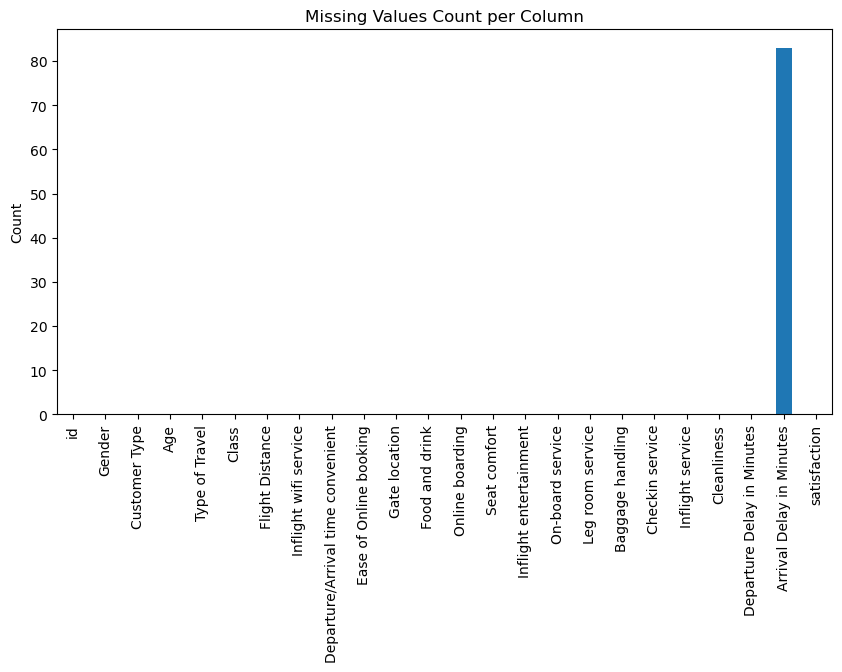

In [4]:
# Step 1: Handle Missing Data
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Bar plot 
missing_values = data.isnull().sum()  # Calculate missing values and assign to missing_values
missing_values.plot(kind='bar', figsize=(10, 5))
plt.title('Missing Values Count per Column')
plt.ylabel('Count')
plt.show()

In [5]:
# Fill missing values in with the median
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)

# Verify no missing values remain
print("Missing values after handling:\n", data.isnull().sum())

Missing values after handling:
 id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_2836\3415016605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)


In [6]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicate rows
data = data.drop_duplicates()

# Verify duplicates are removed
print(f"Number of duplicate rows after removal: {data.duplicated().sum()}")

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


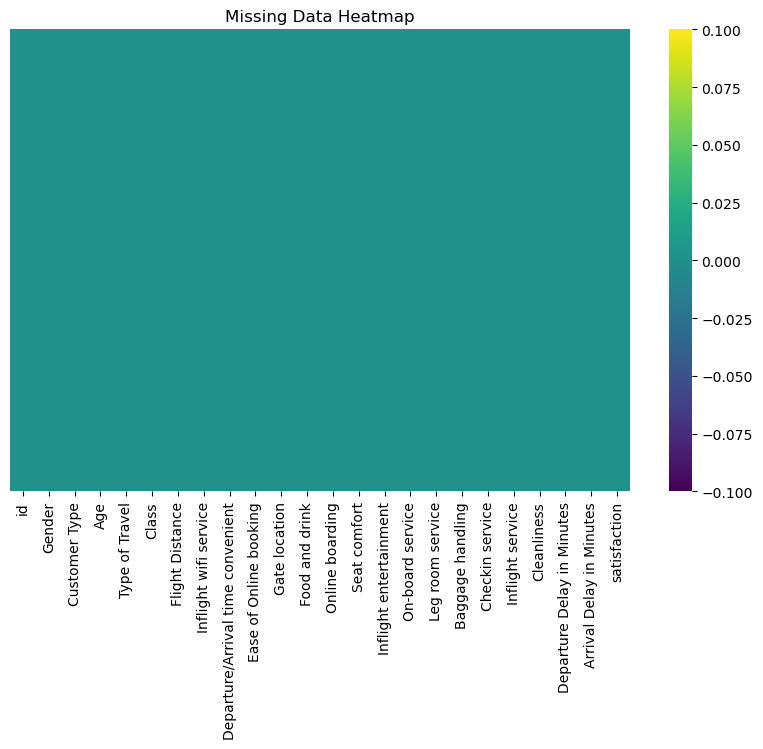

In [9]:
#Visualize if any other missing values were present
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [10]:
# Save the cleaned dataset
data.to_csv('cleaned_test.csv', index=False)

In [12]:
#Step 2: Encoding categorical data

In [16]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_test.csv')
print(df.head())
print(df.shape)

      id  Gender      Customer Type  Age   Type of Travel     Class  \
0  19556  Female     Loyal Customer   52  Business travel       Eco   
1  90035  Female     Loyal Customer   36  Business travel  Business   
2  12360    Male  disloyal Customer   20  Business travel       Eco   
3  77959    Male     Loyal Customer   44  Business travel  Business   
4  36875  Female     Loyal Customer   49  Business travel       Eco   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              160                      5                                  4   
1             2863                      1                                  1   
2              192                      2                                  0   
3             3377                      0                                  0   
4             1182                      2                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0               

In [19]:
# Select categorical columns 
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Separate target if it's categorical
target_col = 'satisfaction'  
if target_col in categorical_cols:
    categorical_cols.remove(target_col)
    print("Target column:", target_col)
    print("Features to encode:", categorical_cols)

Categorical columns: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
Target column: satisfaction
Features to encode: ['Gender', 'Customer Type', 'Type of Travel', 'Class']


--- CATEGORICAL VARIABLES EXPLORATION ---


--- Gender ---
Unique values: 2
Value counts:
Gender
Female    13172
Male      12804
Name: count, dtype: int64
Missing values: 0

--- Customer Type ---
Unique values: 2
Value counts:
Customer Type
Loyal Customer       21177
disloyal Customer     4799
Name: count, dtype: int64
Missing values: 0

--- Type of Travel ---
Unique values: 2
Value counts:
Type of Travel
Business travel    18038
Personal Travel     7938
Name: count, dtype: int64
Missing values: 0

--- Class ---
Unique values: 3
Value counts:
Class
Business    12495
Eco         11564
Eco Plus     1917
Name: count, dtype: int64
Missing values: 0


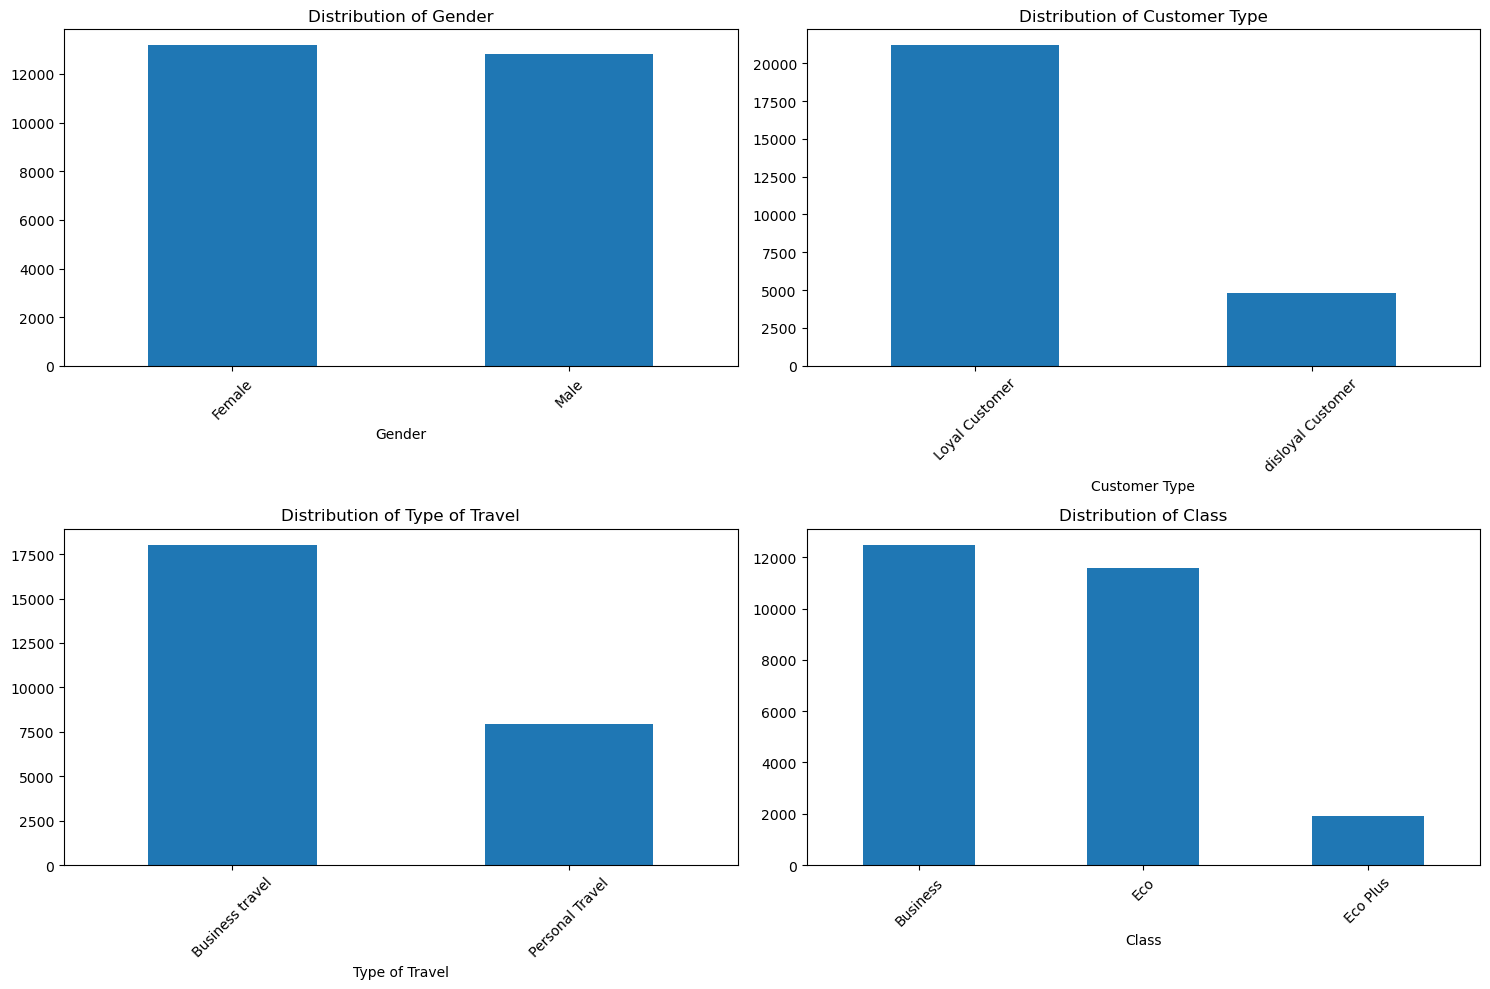

In [25]:
# Detailed exploration of categorical columns
print("--- CATEGORICAL VARIABLES EXPLORATION ---\n")

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Value counts:")
    print(df[col].value_counts())
    print(f"Missing values: {df[col].isnull().sum()}")
    

# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        df[col].value_counts().plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

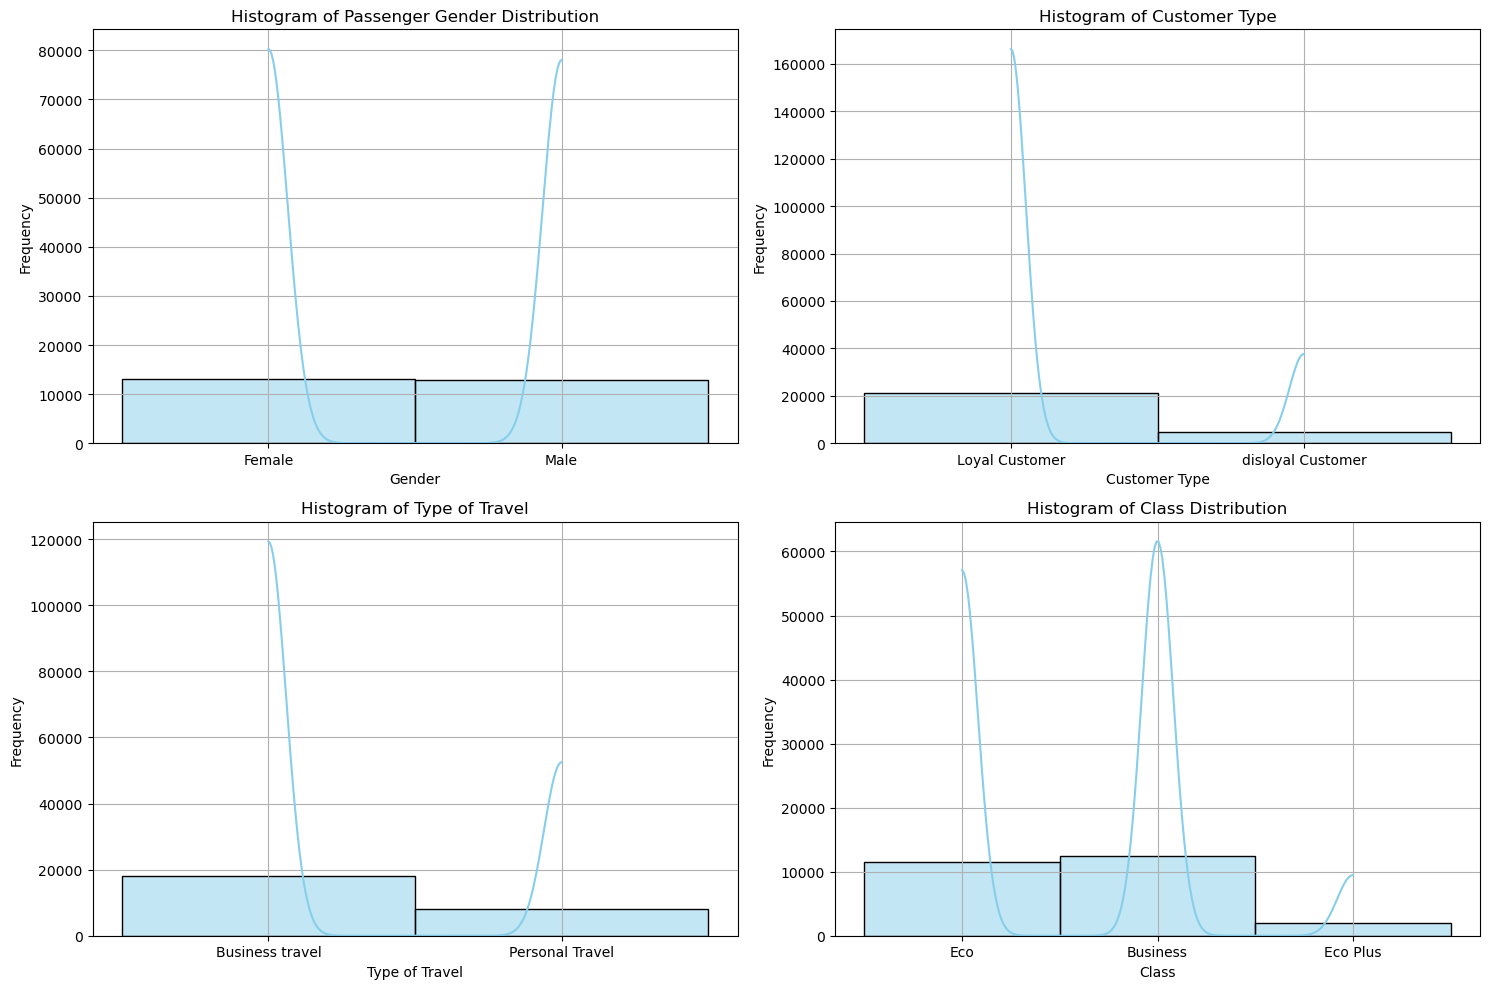

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()  

sns.histplot(data=df, x='Gender', bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of Passenger Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

sns.histplot(data=df, x='Customer Type', bins=20, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title('Histogram of Customer Type')
axes[1].set_xlabel('Customer Type')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

sns.histplot(data=df, x='Type of Travel', bins=20, kde=True, color='skyblue', ax=axes[2])
axes[2].set_title('Histogram of Type of Travel')
axes[2].set_xlabel('Type of Travel')
axes[2].set_ylabel('Frequency')
axes[2].grid(True)

sns.histplot(data=df, x='Class', bins=20, kde=True, color='skyblue', ax=axes[3])
axes[3].set_title('Histogram of Class Distribution')
axes[3].set_xlabel('Class')
axes[3].set_ylabel('Frequency')
axes[3].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [47]:
# Label encode the target (satisfaction: 'satisfied'-1, 'neutral or dissatisfied'-0)
label_encoder = LabelEncoder()
df['satisfaction_encoded'] = label_encoder.fit_transform(df[target_col])
print("Target encoding mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
print(df[['satisfaction', 'satisfaction_encoded']].head())

Target encoding mapping: {'neutral or dissatisfied': 0, 'satisfied': 1}
              satisfaction  satisfaction_encoded
0                satisfied                     1
1                satisfied                     1
2  neutral or dissatisfied                     0
3                satisfied                     1
4                satisfied                     1


In [46]:
# Define the transformer for one-hot encoding 
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Apply encoding
df_encoded = preprocessor.fit_transform(df.drop(columns=[target_col]))  # Drop original target
feature_names = preprocessor.get_feature_names_out()

# Create new DataFrame
df_encoded = pd.DataFrame(df_encoded, columns=feature_names)
df_encoded[target_col + '_encoded'] = df['satisfaction_encoded']  # Add encoded target

print("Encoded DataFrame shape:", df_encoded.shape)
print(df_encoded.head())

Encoded DataFrame shape: (25976, 26)
   cat__Gender_Male  cat__Customer Type_disloyal Customer  \
0               0.0                                   0.0   
1               0.0                                   0.0   
2               1.0                                   1.0   
3               1.0                                   0.0   
4               0.0                                   0.0   

   cat__Type of Travel_Personal Travel  cat__Class_Eco  cat__Class_Eco Plus  \
0                                  0.0             1.0                  0.0   
1                                  0.0             0.0                  0.0   
2                                  0.0             1.0                  0.0   
3                                  0.0             0.0                  0.0   
4                                  0.0             1.0                  0.0   

   remainder__id  remainder__Age  remainder__Flight Distance  \
0        19556.0            52.0                       16

In [45]:
# Check for any remaining object types
print("Data types after encoding:\n", df_encoded.dtypes)

df_encoded.to_csv('encoded_test.csv', index=False)
print("Encoded dataset saved as 'encoded_test.csv'")

Data types after encoding:
 cat__Gender_Male                                float64
cat__Customer Type_disloyal Customer            float64
cat__Type of Travel_Personal Travel             float64
cat__Class_Eco                                  float64
cat__Class_Eco Plus                             float64
remainder__id                                   float64
remainder__Age                                  float64
remainder__Flight Distance                      float64
remainder__Inflight wifi service                float64
remainder__Departure/Arrival time convenient    float64
remainder__Ease of Online booking               float64
remainder__Gate location                        float64
remainder__Food and drink                       float64
remainder__Online boarding                      float64
remainder__Seat comfort                         float64
remainder__Inflight entertainment               float64
remainder__On-board service                     float64
remainder__Leg room 

In [48]:
#Step 3: Outlier removal

In [49]:
# Load the encoded dataset
df_encoded = pd.read_csv('encoded_test.csv')

In [61]:
# Identify numerical columns for outlier detection(continuous features)
numerical_cols = [
    'remainder__Age', 
    'remainder__Flight Distance', 
    'remainder__Departure Delay in Minutes', 
    'remainder__Arrival Delay in Minutes'
]
print("Numerical columns for outlier removal:", numerical_cols)

Numerical columns for outlier removal: ['remainder__Age', 'remainder__Flight Distance', 'remainder__Departure Delay in Minutes', 'remainder__Arrival Delay in Minutes']


In [60]:
# Function to remove outliers using IQR method
def remove_outliers(df, cols):
    df_out = df.copy()
    for col in cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter rows within bounds
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    return df_out

print("\nShape before outlier removal:", df_encoded.shape)


Shape before outlier removal: (25976, 26)


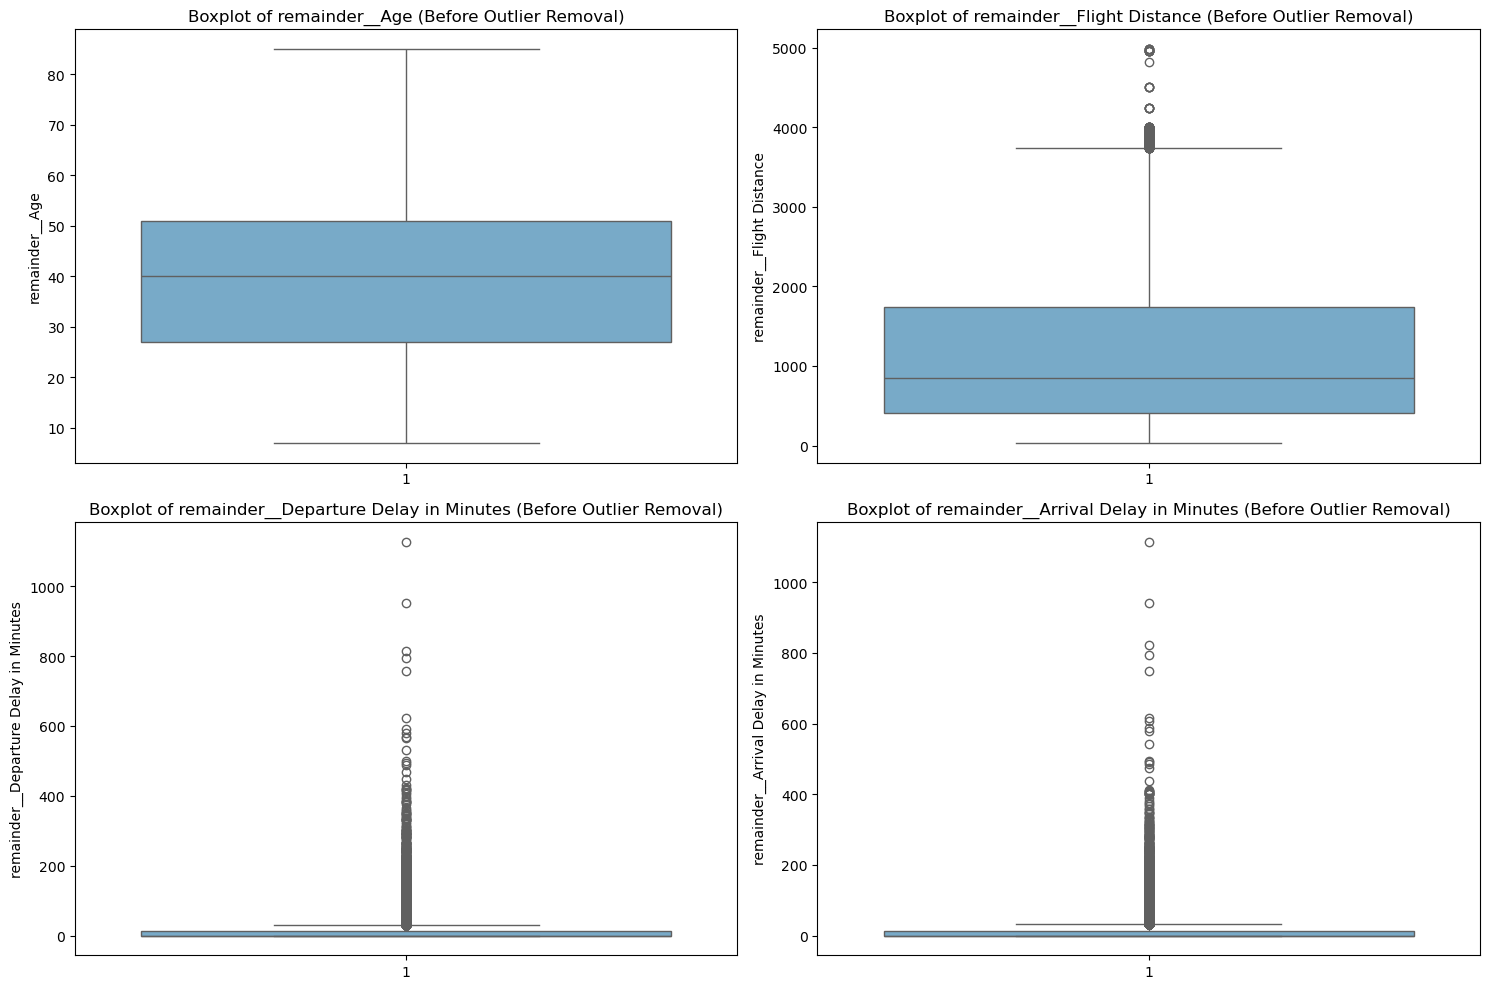

In [59]:
plt.figure(figsize=(15, 10))  
for i, col in enumerate(numerical_cols, 1):  
    plt.subplot(2, 2, i)  
    sns.boxplot(x=[1] * len(df_encoded), y=df_encoded[col], hue=[1] * len(df_encoded), palette="Blues", legend=False)  
    plt.title(f'Boxplot of {col} (Before Outlier Removal)')  
    plt.ylabel(col)  
    plt.xlabel("")  
plt.tight_layout()  
plt.show() 

In [58]:
df_no_outliers = remove_outliers(df_encoded, numerical_cols)

In [65]:
print("Shape after outlier removal:", df_no_outliers.shape)

Shape after outlier removal: (18875, 26)


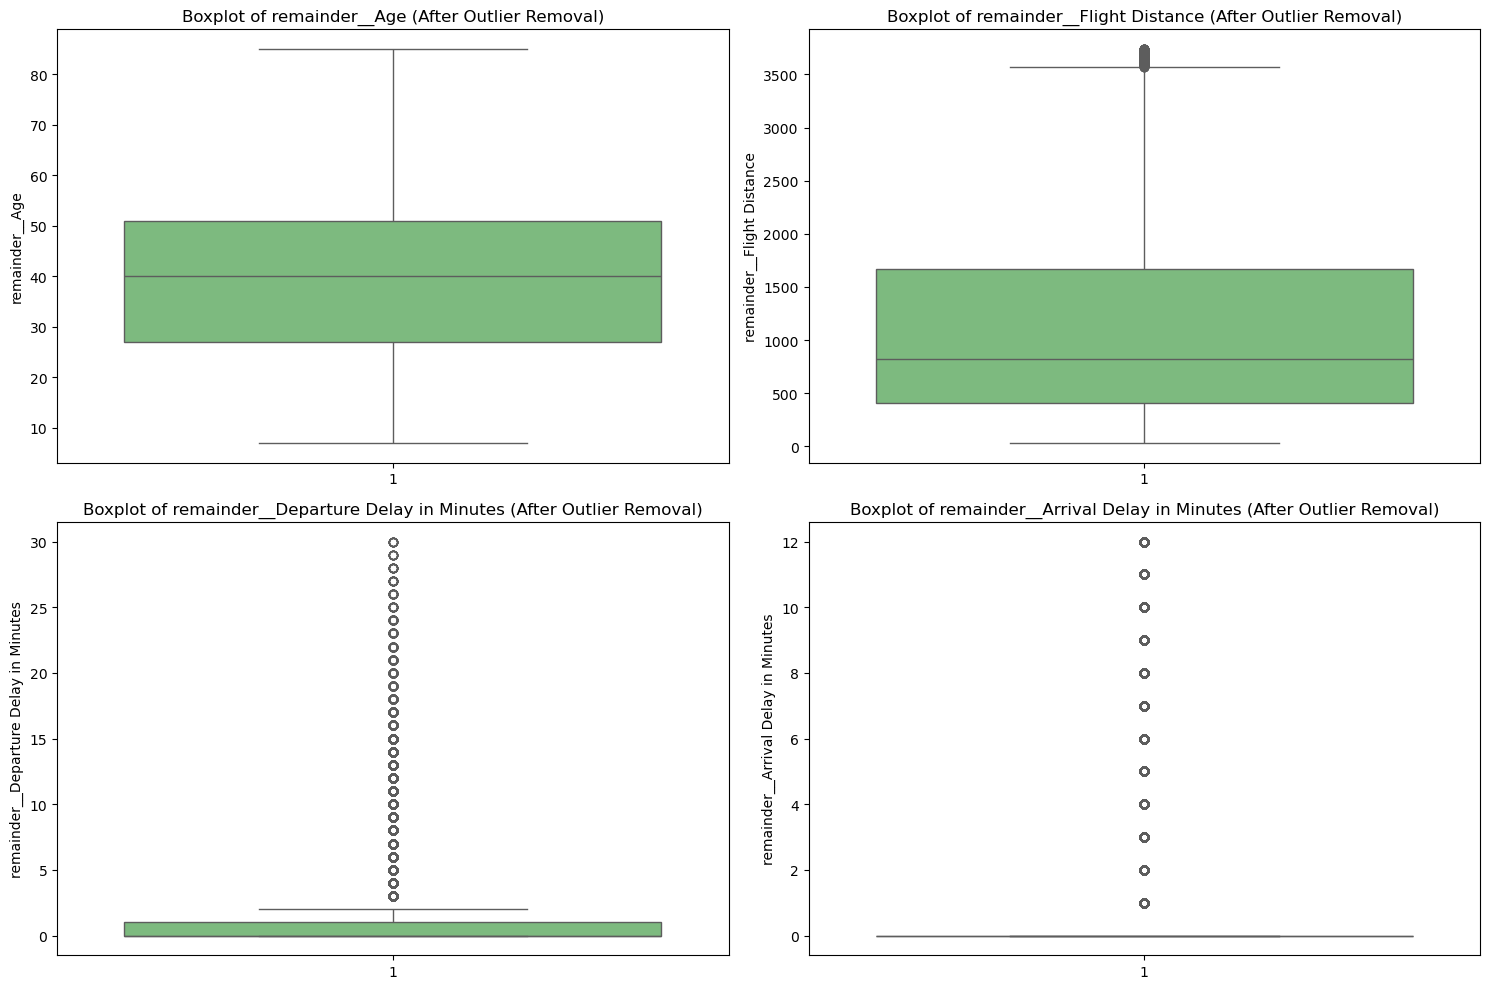

In [63]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=[1] * len(df_no_outliers), y=df_no_outliers[col], hue=[1] * len(df_no_outliers), palette="Greens", legend=False)
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
    plt.ylabel(col)
    plt.xlabel("")
plt.tight_layout()
plt.show()

In [64]:
df_no_outliers.to_csv('no_outliers_test.csv', index=False)
print("\nDataset without outliers saved as 'no_outliers_test.csv'")


Dataset without outliers saved as 'no_outliers_test.csv'


In [66]:
# Step 4:Feature Engineering

In [93]:
df = pd.read_csv('no_outliers_test.csv')
print("Loaded cleaned dataset shape:", df.shape)

# Separate features and target
target_col = 'satisfaction_encoded'
X = df.drop(target_col, axis=1)
y = df[target_col]

print(f"Features shape: {X.shape}, Target shape: {y.shape}")

# Identify key feature groups
service_rating_cols = [col for col in X.columns if any(keyword in col.lower() 
                   for keyword in ['service', 'comfort', 'cleanliness', 'food', 'entertainment'])]
delay_cols = [col for col in X.columns if 'delay' in col.lower()]
travel_cols = [col for col in X.columns if any(keyword in col.lower() 
              for keyword in ['age', 'flight distance', 'class'])]

print(f"\nFeature Groups:")
print(f"   Service Ratings: {len(service_rating_cols)} columns")
print(f"    Delay Columns: {len(delay_cols)} columns") 
print(f"   Travel Info: {len(travel_cols)} columns")

Loaded cleaned dataset shape: (18875, 26)
Features shape: (18875, 25), Target shape: (18875,)

Feature Groups:
   Service Ratings: 9 columns
    Delay Columns: 2 columns
   Travel Info: 5 columns


In [90]:
print("CREATING SERVICE QUALITY FEATURES")
print("-"*60)

X_engineered = X.copy()

# Total Service Score 
if len(service_rating_cols) > 0:
    X_engineered['Total_Service_Score'] = X[service_rating_cols].mean(axis=1)
    print(f"Created 'Total_Service_Score' (avg of {len(service_rating_cols)} ratings)")

# Comfort Score 
comfort_cols = [col for col in service_rating_cols if any(word in col.lower() 
             for word in ['seat', 'leg room', 'cleanliness'])]
if len(comfort_cols) >= 2:
    X_engineered['Comfort_Score'] = X[comfort_cols].mean(axis=1)
    print(f"Created 'Comfort_Score' (avg of {len(comfort_cols)} comfort ratings)")

# Digital Experience 
digital_cols = [col for col in service_rating_cols if any(word in col.lower() 
             for word in ['wifi', 'online booking', 'online boarding'])]
if len(digital_cols) >= 2:
    X_engineered['Digital_Experience'] = X[digital_cols].mean(axis=1)
    print(f"Created 'Digital_Experience' (avg of {len(digital_cols)} digital ratings)")

print(f"Service features created: {len(['Total_Service_Score', 'Comfort_Score', 'Digital_Experience']) if 'Total_Service_Score' in X_engineered.columns else 0}")

CREATING SERVICE QUALITY FEATURES
------------------------------------------------------------
Created 'Total_Service_Score' (avg of 9 ratings)
Created 'Comfort_Score' (avg of 3 comfort ratings)
Service features created: 3


In [92]:
print("CREATING DELAY IMPACT FEATURES")
print("-"*60)

#Total Delay 
if all(col in X_engineered.columns for col in delay_cols):
    X_engineered['Total_Delay_Minutes'] = X_engineered[delay_cols].sum(axis=1)
    print("Created 'Total_Delay_Minutes' (departure + arrival)")

#Significant Delay Flag 
if 'Total_Delay_Minutes' in X_engineered.columns:
    X_engineered['Significant_Delay_Flag'] = (X_engineered['Total_Delay_Minutes'] > 30).astype(int)
    print("Created 'Significant_Delay_Flag' (>30 minutes)")

#Delay Ratio 
if all(col in X_engineered.columns for col in delay_cols):
    X_engineered['Delay_Ratio'] = X_engineered['remainder__Arrival Delay in Minutes'] / (X_engineered['remainder__Departure Delay in Minutes'] + 1)
    print("Created 'Delay_Ratio' (arrival/departure)")

print(f"Delay features created: {len(['Total_Delay_Minutes', 'Significant_Delay_Flag', 'Delay_Ratio'])}")

CREATING DELAY IMPACT FEATURES
------------------------------------------------------------
Created 'Total_Delay_Minutes' (departure + arrival)
Created 'Significant_Delay_Flag' (>30 minutes)
Created 'Delay_Ratio' (arrival/departure)
Delay features created: 3


In [87]:
print("CREATING TRAVEL EXPERIENCE FEATURES")
print("-"*60)

# Long Haul Flag (>2000 miles)
if 'remainder__Flight Distance' in X_engineered.columns:
    X_engineered['Long_Haul_Flight'] = (X_engineered['remainder__Flight Distance'] > 2000).astype(int)
    print("Created 'Long_Haul_Flight' (>2000 miles)")

# Estimated Flight Hours
if 'remainder__Flight Distance' in X_engineered.columns:
    X_engineered['Estimated_Flight_Hours'] = X_engineered['remainder__Flight Distance'] / 500
    print("Created 'Estimated_Flight_Hours' (distance/500mph)")

#Business Travel Premium
business_class_cols = [col for col in X_engineered.columns if 'class_eco' in col.lower()]
if business_class_cols:
    
    eco_class = X_engineered[business_class_cols[0]].fillna(0)
    business_class = 1 - eco_class  # Convert eco=1 to business=1, eco=0
    X_engineered['Business_Travel_Premium'] = business_class
    print("Created 'Business_Travel_Premium' (business class indicator)")

print(f"Travel features created: {len(['Long_Haul_Flight', 'Estimated_Flight_Hours', 'Business_Travel_Premium'])}")

CREATING TRAVEL EXPERIENCE FEATURES
------------------------------------------------------------
Created 'Long_Haul_Flight' (>2000 miles)
Created 'Estimated_Flight_Hours' (distance/500mph)
Created 'Business_Travel_Premium' (business class indicator)
Travel features created: 3


In [86]:
print("CREATING CUSTOMER PROFILE FEATURES")
print("-"*60)

#  Age Groups
if 'remainder__Age' in X_engineered.columns:
    X_engineered['Age_Group'] = pd.cut(X_engineered['remainder__Age'], 
                                      bins=[0, 25, 35, 50, 65, 120], 
                                      labels=[0, 1, 2, 3, 4])
    X_engineered['Age_Group'] = X_engineered['Age_Group'].astype(int)
    print("Created 'Age_Group' (0=Young, 4=Senior)")

# Experience Expectation (age × service)
if 'Total_Service_Score' in X_engineered.columns and 'remainder__Age' in X_engineered.columns:
    X_engineered['Experience_Expectation'] = X_engineered['remainder__Age'] * X_engineered['Total_Service_Score']
    print("Created 'Experience_Expectation' (age × service score)")

print(f"Profile features created: {len(['Age_Group', 'Experience_Expectation'])}")

CREATING CUSTOMER PROFILE FEATURES
------------------------------------------------------------
Created 'Age_Group' (0=Young, 4=Senior)
Created 'Experience_Expectation' (age × service score)
Profile features created: 2


In [85]:
print("CREATING MATHEMATICAL FEATURES")
print("-"*60)

#Service-to-Delay Ratio
if 'Total_Service_Score' in X_engineered.columns and 'Total_Delay_Minutes' in X_engineered.columns:
    X_engineered['Service_to_Delay_Ratio'] = X_engineered['Total_Service_Score'] / (X_engineered['Total_Delay_Minutes']/60 + 1)
    print("Created 'Service_to_Delay_Ratio' (service vs delay)")

#Comfort per Mile
if 'Comfort_Score' in X_engineered.columns and 'remainder__Flight Distance' in X_engineered.columns:
    X_engineered['Comfort_Per_Mile'] = X_engineered['Comfort_Score'] / (X_engineered['remainder__Flight Distance']/1000 + 0.1)
    print("Created 'Comfort_Per_Mile' (comfort per 1000 miles)")

#Delay Impact Score
if 'Delay_Ratio' in X_engineered.columns and 'Total_Service_Score' in X_engineered.columns:
    X_engineered['Delay_Impact_Score'] = X_engineered['Delay_Ratio'] * (5 - X_engineered['Total_Service_Score'])
    print("Created 'Delay_Impact_Score' (delay × low service)")

print(f"Math features created: {len(['Service_to_Delay_Ratio', 'Comfort_Per_Mile', 'Delay_Impact_Score'])}")

CREATING MATHEMATICAL FEATURES
------------------------------------------------------------
Created 'Service_to_Delay_Ratio' (service vs delay)
Created 'Comfort_Per_Mile' (comfort per 1000 miles)
Created 'Delay_Impact_Score' (delay × low service)
Math features created: 3


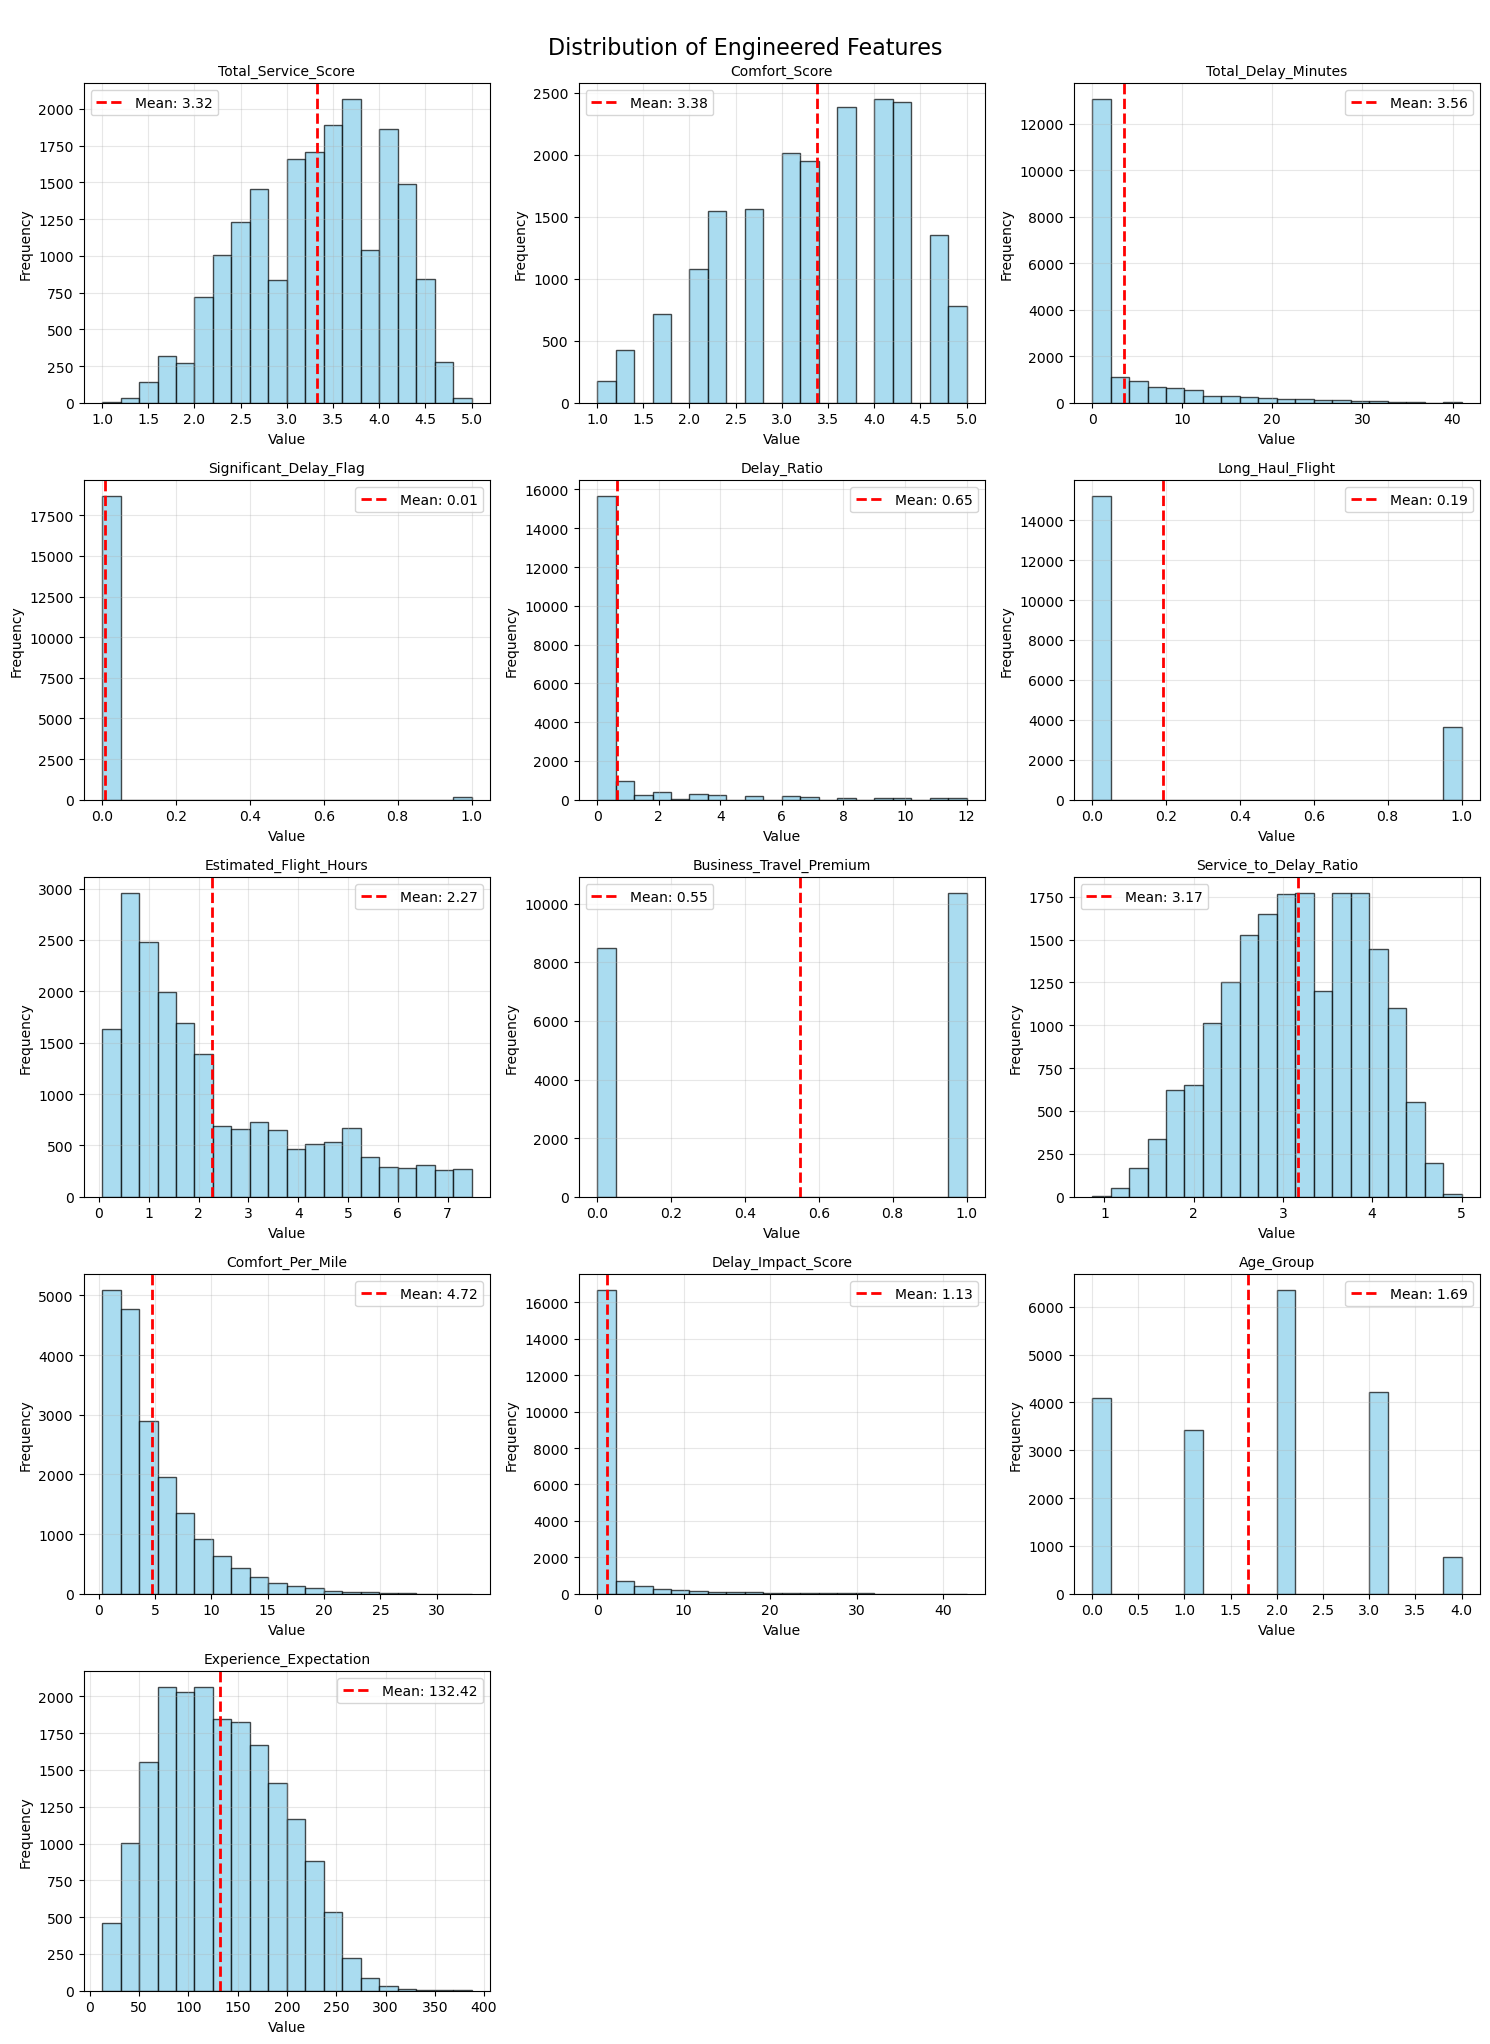

In [82]:
# Calculate number of rows and columns 
n_features = len(new_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols 

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.ravel()

# histogram for each feature
for i, feature in enumerate(new_features):
    ax = axes[i]
    
    ax.hist(X_engineered[feature].dropna(), bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(feature, fontsize=10)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)
    
    # Add mean line
    mean_val = X_engineered[feature].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.legend()

# Hide empty subplots
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.suptitle('\nDistribution of Engineered Features', fontsize=16, y=1.02)
plt.show()

In [83]:
# Count new features
original_cols = X.shape[1]
new_features = len([col for col in X_engineered.columns if col not in X.columns])
total_features = X_engineered.shape[1]

print(f" FEATURE ENGINEERING COMPLETE:")
print(f"  Original: {original_cols} features")
print(f"   Created: {new_features} new features")
print(f"   Total: {total_features} features")
print(f"  Increase: {((total_features/original_cols-1)*100):+.1f}%")

new_features_list = [col for col in X_engineered.columns if col not in X.columns]
print(f"\n NEW FEATURES CREATED ({len(new_features_list)}):")
for i, feature in enumerate(new_features_list, 1):
    print(f"  {i:2d}. {feature}")

print(f"\n QUICK VALIDATION:")
print(f"   No missing values: {X_engineered.isnull().sum().sum() == 0}")
print(f"   All numeric: {len(X_engineered.select_dtypes(include=['object']).columns) == 0}")

df_engineered = pd.concat([X_engineered, y], axis=1)
output_file = 'feature_engineering.csv'
df_engineered.to_csv(output_file, index=False)

 FEATURE ENGINEERING COMPLETE:
  Original: 25 features
   Created: 13 new features
   Total: 38 features
  Increase: +52.0%

 NEW FEATURES CREATED (13):
   1. Total_Service_Score
   2. Comfort_Score
   3. Total_Delay_Minutes
   4. Significant_Delay_Flag
   5. Delay_Ratio
   6. Long_Haul_Flight
   7. Estimated_Flight_Hours
   8. Business_Travel_Premium
   9. Service_to_Delay_Ratio
  10. Comfort_Per_Mile
  11. Delay_Impact_Score
  12. Age_Group
  13. Experience_Expectation

 QUICK VALIDATION:
   No missing values: True
   All numeric: True


In [94]:
#Step 5:Feature Selection

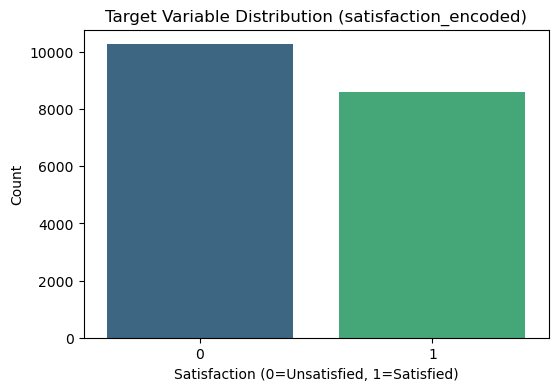

Dropping 10 highly correlated features: ['Total_Service_Score', 'Comfort_Score', 'Total_Delay_Minutes', 'Long_Haul_Flight', 'Estimated_Flight_Hours', 'Business_Travel_Premium', 'Service_to_Delay_Ratio', 'Delay_Impact_Score', 'Age_Group', 'Experience_Expectation']


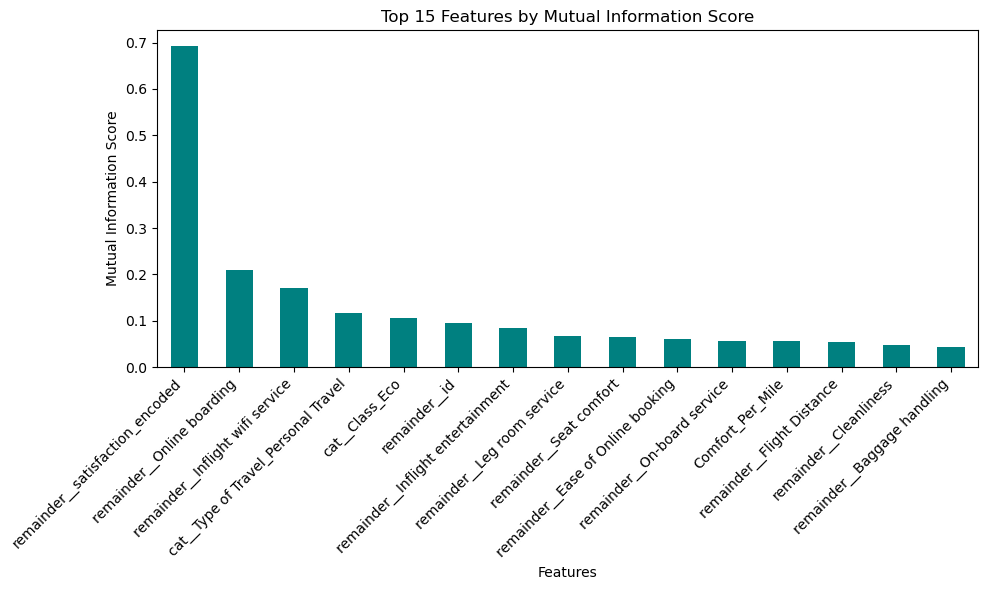

Selected features: ['cat__Type of Travel_Personal Travel', 'cat__Class_Eco', 'remainder__id', 'remainder__Flight Distance', 'remainder__Inflight wifi service', 'remainder__Ease of Online booking', 'remainder__Online boarding', 'remainder__Seat comfort', 'remainder__Inflight entertainment', 'remainder__On-board service', 'remainder__Leg room service', 'remainder__Baggage handling', 'remainder__Cleanliness', 'remainder__satisfaction_encoded', 'Comfort_Per_Mile']
Shape of selected features: (18875, 15)


In [101]:
df = pd.read_csv('feature_engineering.csv')

df = df.loc[:, ~df.columns.duplicated()]

X = df.drop('satisfaction_encoded', axis=1)
y = df['satisfaction_encoded']

plt.figure(figsize=(6, 4))
sns.countplot(x=y, hue=y, palette='viridis', legend=False)
plt.title('Target Variable Distribution (satisfaction_encoded)')
plt.xlabel('Satisfaction (0=Unsatisfied, 1=Satisfied)')
plt.ylabel('Count')
plt.show()

# Drop highly correlated features (threshold > 0.8)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
if to_drop:
    print(f"Dropping {len(to_drop)} highly correlated features: {to_drop}")
    X = X.drop(to_drop, axis=1)
else:
    print("No highly correlated features to drop (threshold > 0.8)")

# Feature selection using Mutual Information
selector = SelectKBest(score_func=mutual_info_classif, k=15)  # Select top 15 features
X_selected = selector.fit_transform(X, y)

# Get selected feature names and their scores
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask].tolist()
feature_scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_scores[:15].plot(kind='bar', color='teal')
plt.title('Top 15 Features by Mutual Information Score')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Selected features:", selected_features)
print("Shape of selected features:", X_selected.shape)

# Convert to DataFrame for further processing
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

In [102]:
X_selected_df.to_csv('selected_features.csv', index=False)

In [107]:
#Step 6:Scaling

Current working directory: C:\Users\DELL\Downloads\pipeline
Dataset loaded successfully.
Loaded DataFrame shape: (18875, 15)
Columns in DataFrame: ['cat__Type of Travel_Personal Travel', 'cat__Class_Eco', 'remainder__id', 'remainder__Flight Distance', 'remainder__Inflight wifi service', 'remainder__Ease of Online booking', 'remainder__Online boarding', 'remainder__Seat comfort', 'remainder__Inflight entertainment', 'remainder__On-board service', 'remainder__Leg room service', 'remainder__Baggage handling', 'remainder__Cleanliness', 'remainder__satisfaction_encoded', 'Comfort_Per_Mile']
Target variable 'remainder__satisfaction_encoded' separated.
Target saved as: target.csv
Feature DataFrame shape: (18875, 14)
Feature columns: ['cat__Type of Travel_Personal Travel', 'cat__Class_Eco', 'remainder__id', 'remainder__Flight Distance', 'remainder__Inflight wifi service', 'remainder__Ease of Online booking', 'remainder__Online boarding', 'remainder__Seat comfort', 'remainder__Inflight entertai

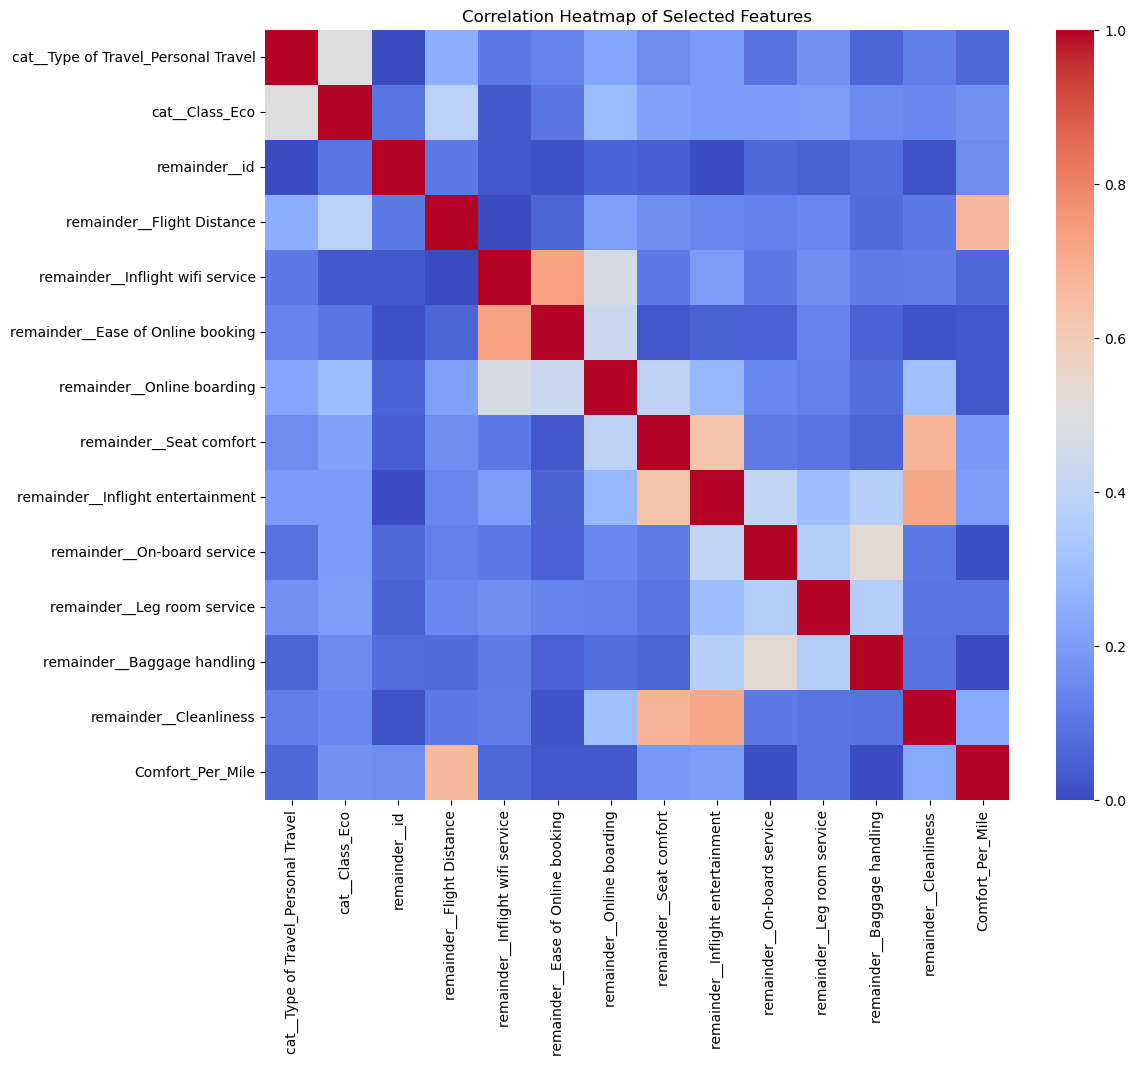

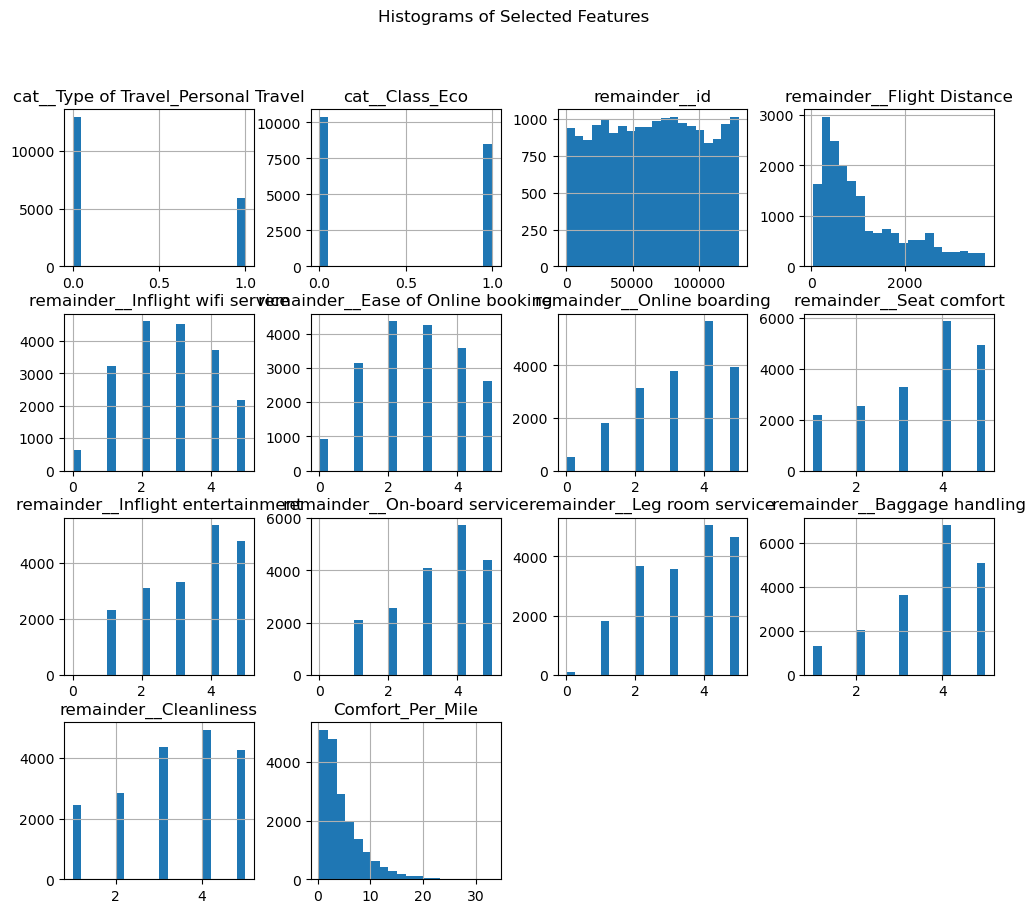

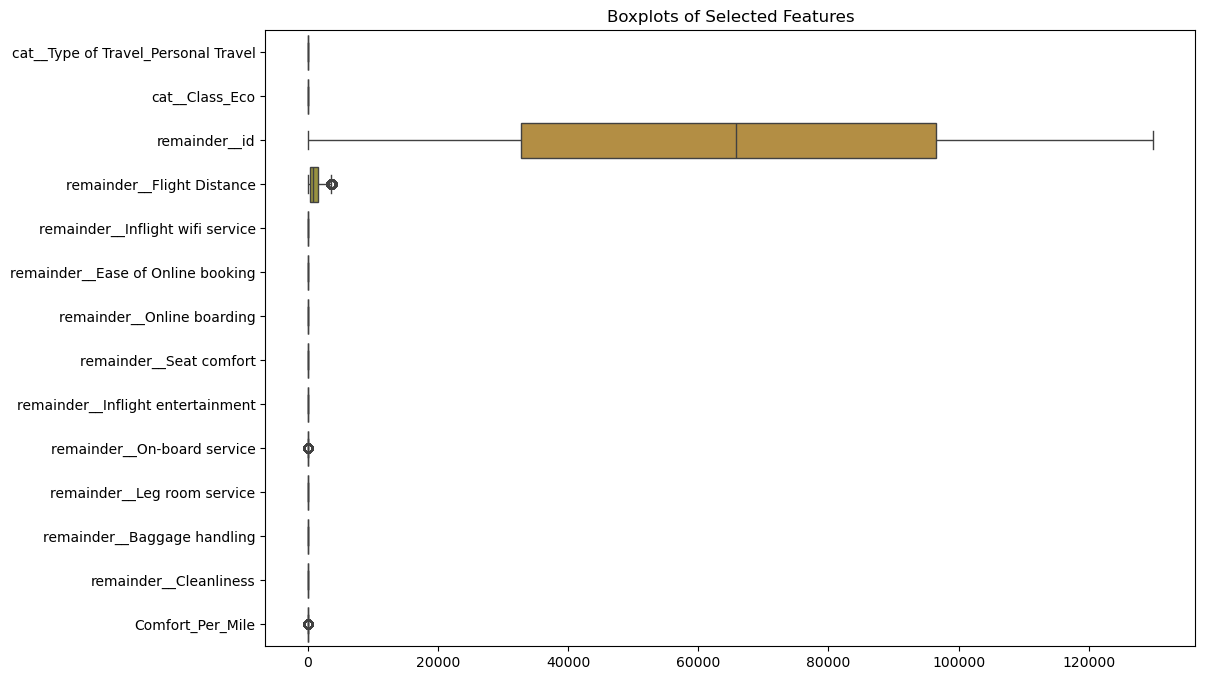

Available columns: ['cat__Type of Travel_Personal Travel', 'cat__Class_Eco', 'remainder__id', 'remainder__Flight Distance', 'remainder__Inflight wifi service', 'remainder__Ease of Online booking', 'remainder__Online boarding', 'remainder__Seat comfort', 'remainder__Inflight entertainment', 'remainder__On-board service', 'remainder__Leg room service', 'remainder__Baggage handling', 'remainder__Cleanliness', 'Comfort_Per_Mile']
Scaling applied successfully.

Summary Statistics After Scaling:
       cat__Type of Travel_Personal Travel  cat__Class_Eco  remainder__id  \
count                         1.887500e+04    1.887500e+04   1.887500e+04   
mean                         -3.322140e-17   -1.293094e-16   2.409257e-17   
std                           1.000026e+00    1.000026e+00   1.000026e+00   
min                          -6.783231e-01   -9.040743e-01  -1.749717e+00   
25%                          -6.783231e-01   -9.040743e-01  -8.690794e-01   
50%                          -6.783231e-01 

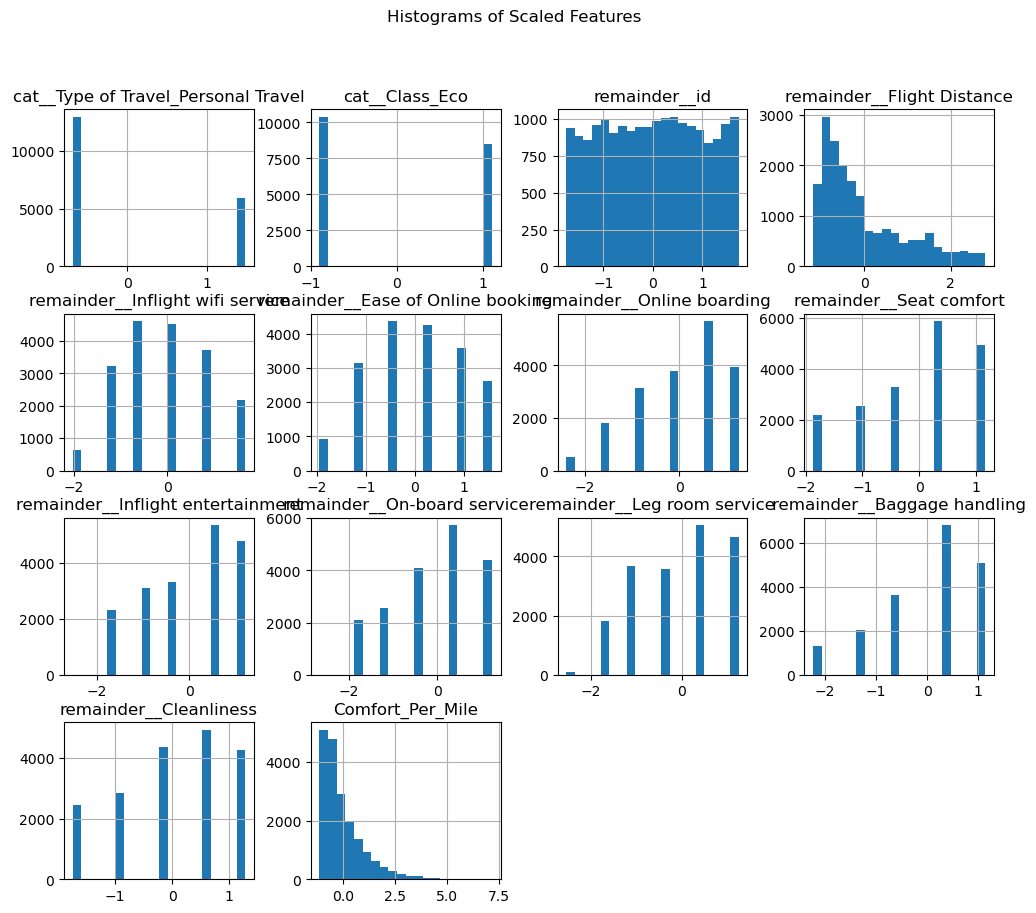

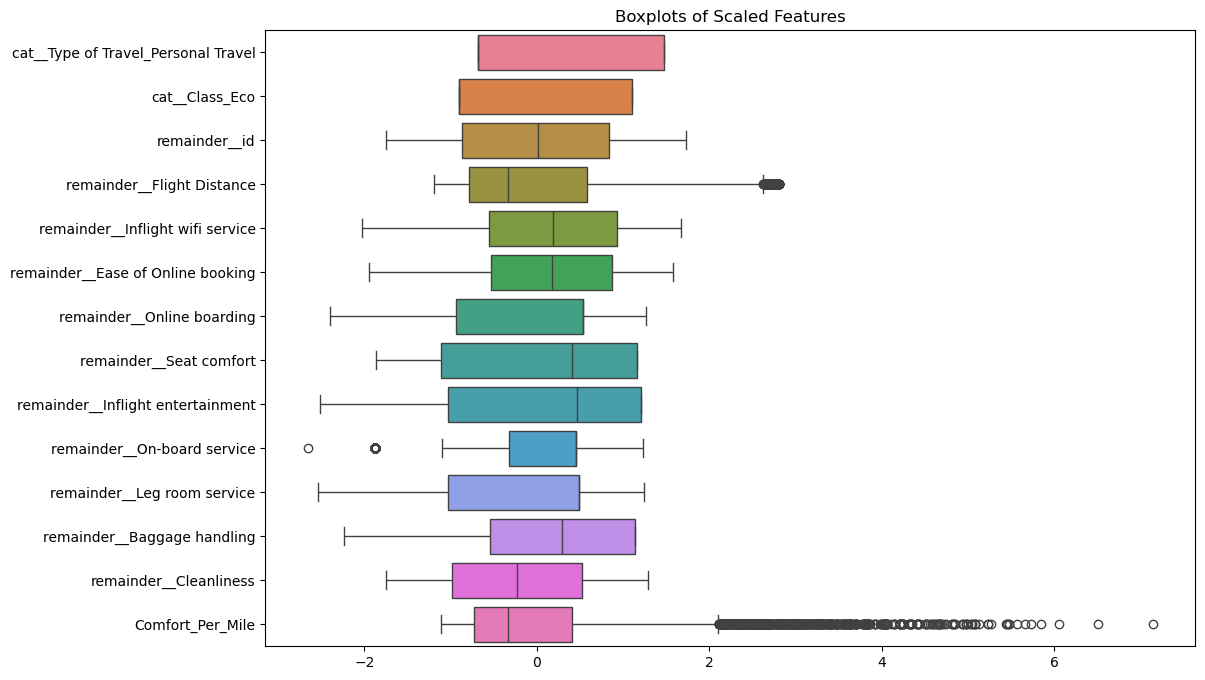

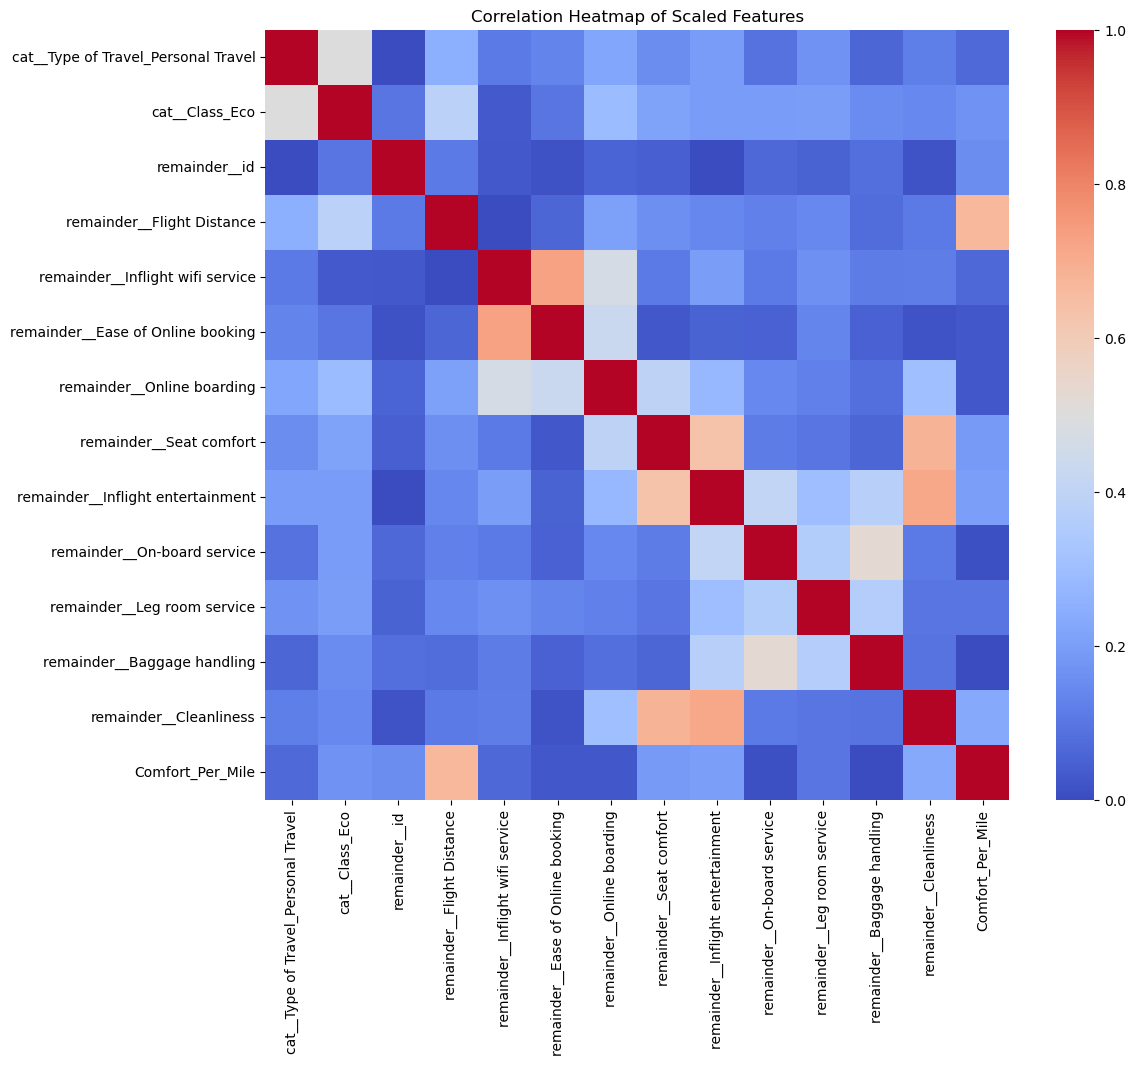

File saved successfully: C:\Users\DELL\Downloads\pipeline\scaled_features.csv


In [110]:
# Print current working directory
print(f"Current working directory: {os.getcwd()}")

# Load dataset
try:
    df = pd.read_csv('selected_features.csv')  # Adjust path if needed
    print("Dataset loaded successfully.")
    print(f"Loaded DataFrame shape: {df.shape}")
    print(f"Columns in DataFrame: {df.columns.tolist()}")
except FileNotFoundError:
    print("Error: 'selected_features.csv' not found. Ensure the file is in the current directory.")
    print(f"Current directory: {os.getcwd()}")
    raise
except pd.errors.ParserError:
    print("Error: Issue parsing 'selected_features.csv'. Check file format or encoding.")
    raise
except Exception as e:
    print(f"Error loading dataset: {e}")
    raise

# Separate features and target
try:
    if 'remainder__satisfaction_encoded' in df.columns:
        X_selected_df = df.drop('remainder__satisfaction_encoded', axis=1)
        y = df['remainder__satisfaction_encoded']
        print("Target variable 'remainder__satisfaction_encoded' separated.")

        try:
            y.to_csv('target.csv', index=False)
            print("Target saved as: target.csv")
        except Exception as e:
            print(f"Error saving target.csv: {e}")
            raise
    else:
        X_selected_df = df
        print("Warning: 'remainder__satisfaction_encoded' not found. Proceeding with all columns as features.")
except KeyError as e:
    print(f"Error accessing columns: {e}")
    raise

print(f"Feature DataFrame shape: {X_selected_df.shape}")
print(f"Feature columns: {X_selected_df.columns.tolist()}")

print("\nSummary Statistics of Selected Features:")
print(X_selected_df.describe())

print("\nMissing Values in Selected Features:")
print(X_selected_df.isna().sum())

plt.figure(figsize=(12, 10))
corr_matrix = X_selected_df.corr().abs()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

X_selected_df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Selected Features')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=X_selected_df, orient='h')
plt.title('Boxplots of Selected Features')
plt.show()

specific_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
available_columns = [col for col in specific_columns if col in X_selected_df.columns]

if len(available_columns) >= 4:
    # Create a 2x2 subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()  

    sns.histplot(data=X_selected_df, x='Gender', bins=20, kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title('Histogram of Passenger Gender Distribution')
    axes[0].set_xlabel('Gender')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(True)

    sns.histplot(data=X_selected_df, x='Customer Type', bins=20, kde=True, color='skyblue', ax=axes[1])
    axes[1].set_title('Histogram of Customer Type')
    axes[1].set_xlabel('Customer Type')
    axes[1].set_ylabel('Frequency')
    axes[1].grid(True)

    sns.histplot(data=X_selected_df, x='Type of Travel', bins=20, kde=True, color='skyblue', ax=axes[2])
    axes[2].set_title('Histogram of Type of Travel')
    axes[2].set_xlabel('Type of Travel')
    axes[2].set_ylabel('Frequency')
    axes[2].grid(True)

    sns.histplot(data=X_selected_df, x='Class', bins=20, kde=True, color='skyblue', ax=axes[3])
    axes[3].set_title('Histogram of Class Distribution')
    axes[3].set_xlabel('Class')
    axes[3].set_ylabel('Frequency')
    axes[3].grid(True)

    # Adjust layout 
    plt.tight_layout()
    plt.show()
else:
    print("Warning: Not all specified columns ('Gender', 'Customer Type', 'Type of Travel', 'Class') are present.")
    print(f"Available columns: {X_selected_df.columns.tolist()}")

scaler = StandardScaler()
try:
    X_scaled = scaler.fit_transform(X_selected_df)
    print("Scaling applied successfully.")
except ValueError as e:
    print(f"Error during scaling: {e}")
    raise

X_scaled_df = pd.DataFrame(X_scaled, columns=X_selected_df.columns)

print("\nSummary Statistics After Scaling:")
print(X_scaled_df.describe())


X_scaled_df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Scaled Features')
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(data=X_scaled_df, orient='h')
plt.title('Boxplots of Scaled Features')
plt.show()

plt.figure(figsize=(12, 10))
scaled_corr_matrix = X_scaled_df.corr().abs()
sns.heatmap(scaled_corr_matrix, annot=False, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Heatmap of Scaled Features')
plt.show()

# Save scaled features
try:
    output_file = 'scaled_features.csv'
    X_scaled_df.to_csv(output_file, index=False)
    if os.path.exists(output_file):
        print(f"File saved successfully: {os.path.abspath(output_file)}")
    else:
        print("Error: File was not saved. Check permissions or directory.")
except PermissionError:
    print("Error: Permission denied when saving 'scaled_features.csv'.")
    raise
except Exception as e:
    print(f"Error saving file: {e}")
    raise

Scaled features loaded successfully.
Scaled features shape: (18875, 14)
Scaled features columns: ['cat__Type of Travel_Personal Travel', 'cat__Class_Eco', 'remainder__id', 'remainder__Flight Distance', 'remainder__Inflight wifi service', 'remainder__Ease of Online booking', 'remainder__Online boarding', 'remainder__Seat comfort', 'remainder__Inflight entertainment', 'remainder__On-board service', 'remainder__Leg room service', 'remainder__Baggage handling', 'remainder__Cleanliness', 'Comfort_Per_Mile']
Target loaded successfully.
Target shape: (18875, 1)
Target columns: ['remainder__satisfaction_encoded']
Features and target are aligned.

Summary Statistics of Scaled Features:
       cat__Type of Travel_Personal Travel  cat__Class_Eco  remainder__id  \
count                         1.887500e+04    1.887500e+04   1.887500e+04   
mean                         -3.322140e-17   -1.293094e-16   2.258679e-17   
std                           1.000026e+00    1.000026e+00   1.000026e+00   
min   

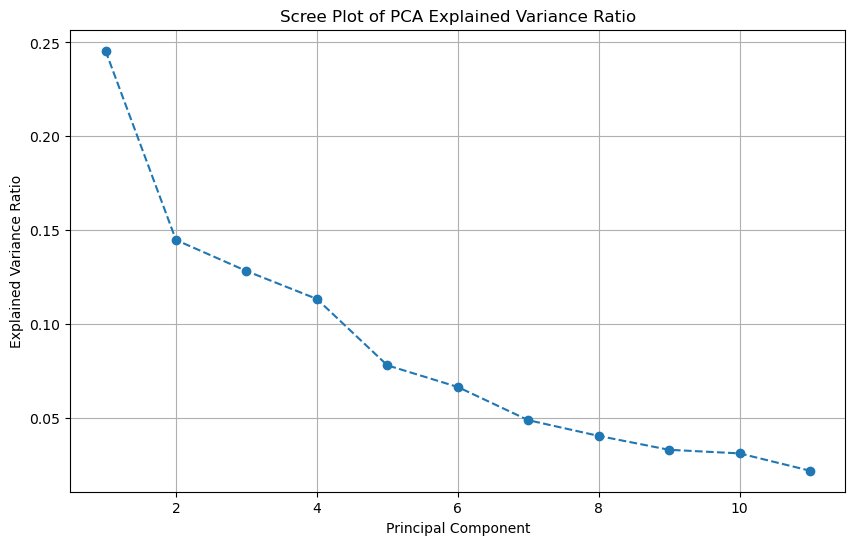

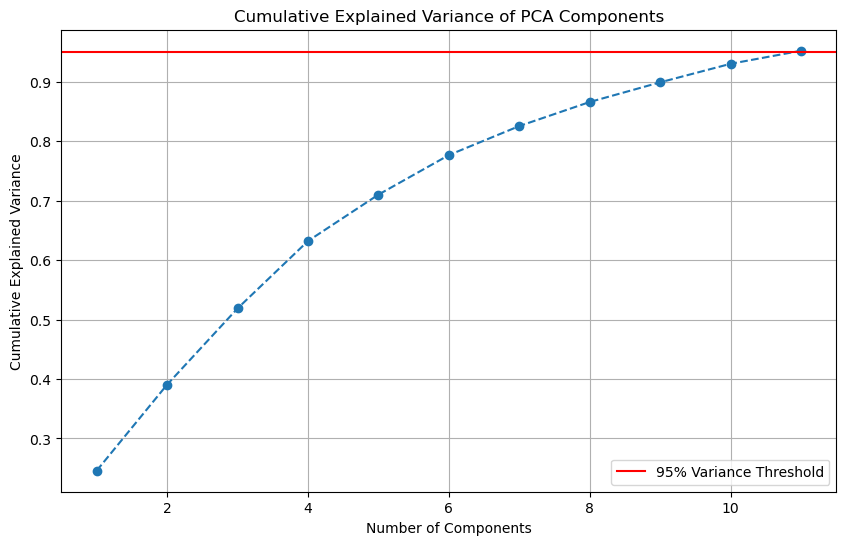

File saved successfully: C:\Users\DELL\Downloads\pipeline\reduced_features.csv


In [114]:
# Load scaled features
try:
    X_scaled_df = pd.read_csv('scaled_features.csv')  
    print("Scaled features loaded successfully.")
    print(f"Scaled features shape: {X_scaled_df.shape}")
    print(f"Scaled features columns: {X_scaled_df.columns.tolist()}")
except FileNotFoundError:
    print("Error: 'scaled_features.csv' not found. Ensure the file is in the current directory.")
    print(f"Current directory: {os.getcwd()}")
    raise
except pd.errors.ParserError:
    print("Error: Issue parsing 'scaled_features.csv'. Check file format or encoding.")
    raise
except Exception as e:
    print(f"Error loading scaled features: {e}")
    raise

# Load target
try:
    y = pd.read_csv('target.csv')  
    print("Target loaded successfully.")
    print(f"Target shape: {y.shape}")
    print(f"Target columns: {y.columns.tolist()}")
except FileNotFoundError:
    print("Error: 'target.csv' not found. Ensure the file is in the current directory.")
    print(f"Current directory: {os.getcwd()}")
    raise
except pd.errors.ParserError:
    print("Error: Issue parsing 'target.csv'. Check file format or encoding.")
    raise
except Exception as e:
    print(f"Error loading target: {e}")
    raise

# Ensure target has one column
if y.shape[1] == 1:
    y = y.iloc[:, 0]
else:
    print("Error: 'target.csv' should contain one column (remainder__satisfaction_encoded).")
    raise

# Check alignment of features and target
if len(X_scaled_df) != len(y):
    print(f"Error: Mismatch between features ({len(X_scaled_df)}) and target ({len(y)}) rows.")
    raise
print("Features and target are aligned.")

# Summary statistics of scaled features
print("\nSummary Statistics of Scaled Features:")
print(X_scaled_df.describe())

# Apply PCA
try:
    pca = PCA(n_components=0.95, random_state=42)
    X_reduced = pca.fit_transform(X_scaled_df)
    print(f"PCA applied successfully. Reduced to {X_reduced.shape[1]} components.")
except Exception as e:
    print(f"Error during PCA: {e}")
    raise

# Create DataFrame for reduced features
component_names = [f"PC{i+1}" for i in range(X_reduced.shape[1])]
X_reduced_df = pd.DataFrame(X_reduced, columns=component_names)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio per Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}% of variance)")

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot of PCA Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Threshold')
plt.title('Cumulative Explained Variance of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Save reduced features
try:
    output_file = 'reduced_features.csv'
    X_reduced_df.to_csv(output_file, index=False)
    if os.path.exists(output_file):
        print(f"File saved successfully: {os.path.abspath(output_file)}")
    else:
        print("Error: File was not saved. Check permissions or directory.")
except PermissionError:
    print("Error: Permission denied when saving 'reduced_features.csv'.")
    raise
except Exception as e:
    print(f"Error saving file: {e}")
    raise

In [115]:
X_selected_df.to_csv('Processed_Data.csv', index=False)